In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
train_1=pd.read_csv('C:/Users/82102/OneDrive - dongguk.edu/바탕 화면/2023.1학기 비어플/train_1.csv',encoding='utf-8')
train_2=pd.read_csv('C:/Users/82102/OneDrive - dongguk.edu/바탕 화면/2023.1학기 비어플/train_2.csv',encoding='utf-8')
test=pd.read_csv('C:/Users/82102/OneDrive - dongguk.edu/바탕 화면/2023.1학기 비어플/test_set.csv',encoding='utf-8')

train = pd.concat([train_1,train_2], ignore_index = True)

In [3]:
X_train=train.drop(['STATUS'], axis=1)
y_train=train['STATUS']

X_test=test.drop(['STATUS'], axis=1)
y_test=test['STATUS']

## 1. Logistic Reggression

In [19]:
model_log = LogisticRegression(penalty = 'l2', solver='saga', C = 10, max_iter = 100, random_state=0) 
model_log.fit(X_train, y_train) # 모델 학습

y_pred= model_log.predict(X_test) # 예측 라벨
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred) 
print("ROC AUC Score: {}".format(roc_auc))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     55691
           1       0.21      0.84      0.33      1051

    accuracy                           0.94     56742
   macro avg       0.60      0.89      0.65     56742
weighted avg       0.98      0.94      0.96     56742

ROC AUC Score: 0.8919561606424848


C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## 2. Random Forest

In [20]:
model_rf = RandomForestClassifier(random_state=0, max_depth = 5, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
model_rf.fit(X_train, y_train) # 모델 학습

y_pred= model_rf.predict(X_test) # 예측 라벨
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred) 
print("ROC AUC Score: {}".format(roc_auc))

C:\Users\82102\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       1.00      0.87      0.93     55691
           1       0.13      0.99      0.22      1051

    accuracy                           0.87     56742
   macro avg       0.56      0.93      0.58     56742
weighted avg       0.98      0.87      0.92     56742

ROC AUC Score: 0.9314528372976066


## 3. SVM

In [21]:
model_svc = SVC(kernel = 'rbf',random_state=0, C=0.1, gamma=1, probability=True)
model_svc.fit(X_train, y_train) # 모델 학습

y_pred= model_svc.predict(X_test) # 예측 라벨
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred) 
print("ROC AUC Score: {}".format(roc_auc))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81     55691
           1       0.05      0.92      0.10      1051

    accuracy                           0.68     56742
   macro avg       0.52      0.80      0.45     56742
weighted avg       0.98      0.68      0.79     56742

ROC AUC Score: 0.7993205799275638


## 4. XGB

In [22]:
model_xgb = XGBClassifier(random_state=0, colsample_bytree= 0.5, gamma= 0, learning_rate= 0.01, max_depth=2, n_estimators=10, subsample=0.5)
model_xgb.fit(X_train, y_train) # 모델 학습

y_pred= model_xgb.predict(X_test) # 예측 라벨
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred) 
print("ROC AUC Score: {}".format(roc_auc))

[06:44:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     55691
           1       0.12      0.99      0.22      1051

    accuracy                           0.87     56742
   macro avg       0.56      0.93      0.58     56742
weighted avg       0.98      0.87      0.92     56742

ROC AUC Score: 0.9311295227791258


C:\Users\82102\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## 5. KNN

In [23]:
model_k = KNeighborsClassifier(n_neighbors= 3)
model_k.fit(X_train, y_train) # 모델 학습

y_pred= model_k.predict(X_test) # 예측 라벨
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred) 
print("ROC AUC Score: {}".format(roc_auc))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     55691
           1       0.14      0.85      0.24      1051

    accuracy                           0.90     56742
   macro avg       0.57      0.87      0.59     56742
weighted avg       0.98      0.90      0.93     56742

ROC AUC Score: 0.8743945647760996


## 6. Soft Ensemble

In [24]:
model_se = VotingClassifier(estimators=[ ('LogisticRegression', model_log), ('RandomForest', model_rf),
                                        ('SVC', model_svc),('XGB', model_xgb),('KNN', model_k)], voting='soft')

model_se.fit(X_train, y_train) # 모델 학습

y_pred= model_se.predict(X_test) # 예측 라벨
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred) 
print("ROC AUC Score: {}".format(roc_auc))

C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\82102\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:44:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     55691
           1       0.19      0.86      0.31      1051

    accuracy                           0.93     56742
   macro avg       0.59      0.89      0.64     56742
weighted avg       0.98      0.93      0.95     56742

ROC AUC Score: 0.8927181725055172


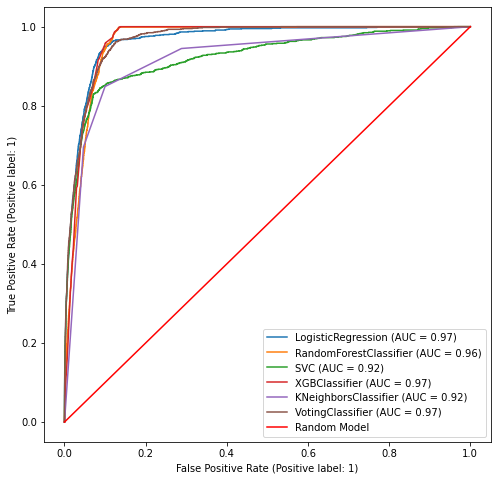

In [25]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(model_rf, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(model_svc, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(model_xgb, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(model_k, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(model_se, X_test, y_test, ax=ax)

ax.plot([0, 1], [0, 1], color='red', label='Random Model')
ax.legend()
plt.show()